In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

dataset = pd.read_csv("http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv")
dataset.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
dataset.drop(["Channel", "Region"], axis = 1, inplace=True)
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
dataset.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [7]:
fresh_1 = 3000
display(dataset.loc[dataset.Fresh < fresh_1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [9]:
frozen_1 = 700
display(dataset.loc[dataset.Frozen < frozen_1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [10]:
frozen_2 = 4000
display(dataset.loc[dataset.Frozen > frozen_2, :].head(7))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916
40,24025,4332,4757,9510,1145,5864


In [13]:
indices = [43, 12, 40]

samples = pd.DataFrame(dataset.loc[indices], columns = dataset.columns)
display(samples)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
43,630,11095,23998,787,9529,72
12,31714,12319,11757,287,3881,2931
40,24025,4332,4757,9510,1145,5864


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [33]:
col_list = list(dataset.columns)

for col in col_list:
    new_dataset = dataset.drop([col], axis = 1)
    new_cols = pd.DataFrame(dataset.loc[:, col])

    X_train, X_test, y_train, y_test = train_test_split(new_dataset, new_cols, test_size=0.25, random_state=42)

    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(X_train, y_train)
    
    score = tree.score(X_test, y_test)
    print('R2 score for {} as variable: {}'.format(col, score))    

R2 score for Fresh as variable: 0.23442582811079016
R2 score for Milk as variable: 0.31858814314886996
R2 score for Grocery as variable: 0.6424575908792403
R2 score for Frozen as variable: -0.24360091089295888
R2 score for Detergents_Paper as variable: 0.3183998357937333
R2 score for Delicassen as variable: -2.5426175452253803
R2 score for label as variable: 0.6614640580347327


In [0]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
clusters = km.fit_predict(dataset.iloc[:,1:])
dataset["label"] = clusters

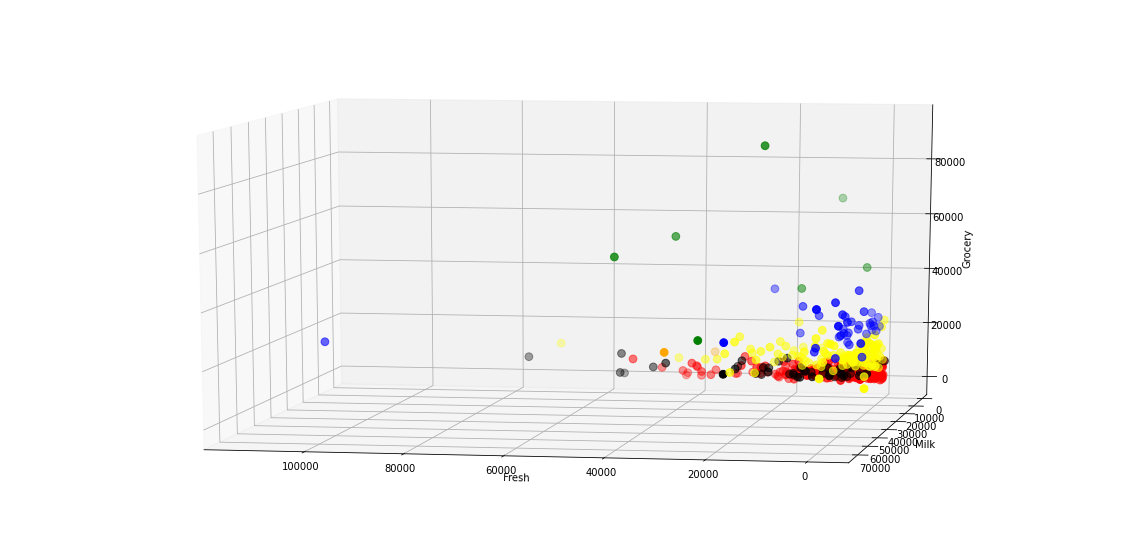

In [43]:
fig = plt.figure(figsize=(20,10))
cluster_plot = fig.add_subplot(111, projection='3d')

cluster_plot.scatter(dataset.Fresh[dataset.label == 0], dataset.Milk[dataset.label == 0], dataset.Grocery[dataset.label == 0], c='red', s=60)
cluster_plot.scatter(dataset.Fresh[dataset.label == 1], dataset.Milk[dataset.label == 1], dataset.Grocery[dataset.label == 1], c='green', s=60)
cluster_plot.scatter(dataset.Fresh[dataset.label == 2], dataset.Milk[dataset.label == 2], dataset.Grocery[dataset.label == 2], c='yellow', s=60)
cluster_plot.scatter(dataset.Fresh[dataset.label == 3], dataset.Milk[dataset.label == 3], dataset.Grocery[dataset.label == 3], c='orange', s=60)
cluster_plot.scatter(dataset.Fresh[dataset.label == 4], dataset.Milk[dataset.label == 4], dataset.Grocery[dataset.label == 4], c='blue', s=60)
cluster_plot.scatter(dataset.Fresh[dataset.label == 5], dataset.Milk[dataset.label == 5], dataset.Grocery[dataset.label == 5], c='black', s=60)

cluster_plot.view_init(10, 100)
plt.xlabel("Fresh")
plt.ylabel("Milk")
cluster_plot.set_zlabel("Grocery")
plt.show()